In [143]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import warnings
#stop warning
warnings.filterwarnings('ignore', category=FutureWarning)

# Stock Volatility

In [144]:
# Load the local Stock data
df = pd.read_csv('C:/Users/Developer/pythonProject/breakout_test/stock_data_olympic.csv',parse_dates=['Date'],index_col = 0)

returns = 100 * df.Close.pct_change().dropna()



Text(0.5, 1.0, 'Stock Returns')

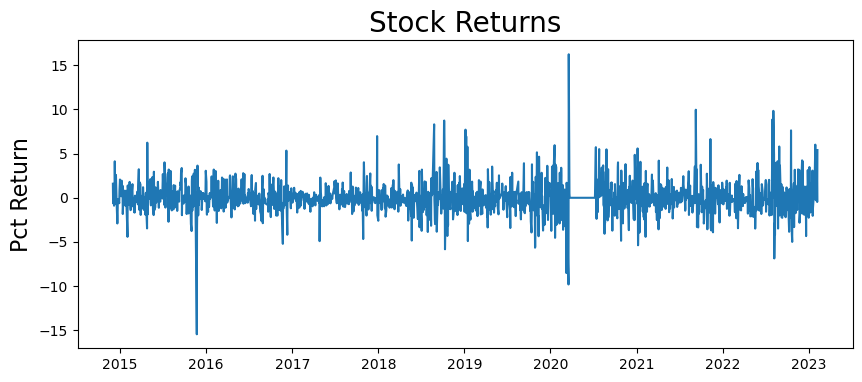

In [145]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('Stock Returns', fontsize=20)

# PACF

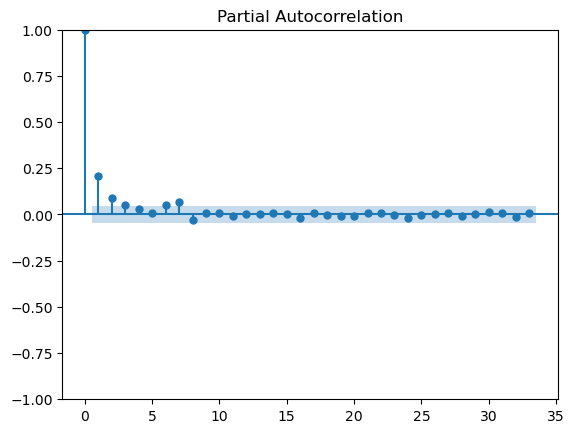

In [146]:
plot_pacf(returns**2)
plt.show()

# Fit GARCH(3,3)

In [147]:
model = arch_model(returns, p=3, q=3)


In [148]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 7527.943013138282
Iteration:      2,   Func. Count:     22,   Neg. LLF: 1378189.683335267
Iteration:      3,   Func. Count:     32,   Neg. LLF: 4767.542046789931
Iteration:      4,   Func. Count:     42,   Neg. LLF: 3932.780395584312
Iteration:      5,   Func. Count:     52,   Neg. LLF: 3904.694557428896
Iteration:      6,   Func. Count:     62,   Neg. LLF: 3874.336296181414
Iteration:      7,   Func. Count:     72,   Neg. LLF: 3819.710056694744
Iteration:      8,   Func. Count:     83,   Neg. LLF: 3655.3718285334335
Iteration:      9,   Func. Count:     93,   Neg. LLF: 3645.3574414879936
Iteration:     10,   Func. Count:    103,   Neg. LLF: 3634.359607878984
Iteration:     11,   Func. Count:    112,   Neg. LLF: 3634.11804787906
Iteration:     12,   Func. Count:    121,   Neg. LLF: 3634.0398752238298
Iteration:     13,   Func. Count:    130,   Neg. LLF: 3634.002152159732
Iteration:     14,   Func. Count:    139,   Neg. LLF: 3634.001

In [149]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3634.00
Distribution:                  Normal   AIC:                           7284.00
Method:            Maximum Likelihood   BIC:                           7328.55
                                        No. Observations:                 1935
Date:                Tue, Feb 21 2023   Df Residuals:                     1934
Time:                        21:50:45   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0290  4.143e-02     -0.700      0.484 [ -0.110,5.219e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.7749      0.354      2.190  2.856e-02 [8.125e-02,  1.469]
alpha[1]       0.3234  8.171e-02      3.958  7.553e-05   [  0.163,  0.484]
alpha[2]       0.0659      0.174      0.380      0.704   [ -0.274,  0.406]
alpha[3]       0.2183      0.423      0.517      0.605   [ -0.610,  1.046]
beta[1]    3.0965e-11      0.567  5.458e-11      1.000   [ -1.112,  1.112]
beta[2]    4.5586e-11      0.576  7.915e-11      1.000   [ -1.129,  1.129]
beta[3]        0.2386      0.228      1.045      0.296   [ -0.209,  0.686]
==========================================================================

Covariance estimator: robust
"""

# Try GARCH(3,0) = ARCH(3)

In [150]:
model = arch_model(returns, p=3, q=0)

In [151]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 7950.372843696749
Iteration:      2,   Func. Count:     16,   Neg. LLF: 8634.4886327741
Iteration:      3,   Func. Count:     25,   Neg. LLF: 13528.850990495419
Iteration:      4,   Func. Count:     32,   Neg. LLF: 10193.516483596824
Iteration:      5,   Func. Count:     39,   Neg. LLF: 16137.986334030062
Iteration:      6,   Func. Count:     46,   Neg. LLF: 3841.2157645998154
Iteration:      7,   Func. Count:     53,   Neg. LLF: 3775.926275097698
Iteration:      8,   Func. Count:     60,   Neg. LLF: 3687.735800428597
Iteration:      9,   Func. Count:     67,   Neg. LLF: 3660.626654043369
Iteration:     10,   Func. Count:     73,   Neg. LLF: 3660.464182553974
Iteration:     11,   Func. Count:     79,   Neg. LLF: 3660.4434212210317
Iteration:     12,   Func. Count:     85,   Neg. LLF: 3660.435096718354
Iteration:     13,   Func. Count:     91,   Neg. LLF: 3660.43457748903
Iteration:     14,   Func. Count:     97,   Neg. LLF: 3660.434

In [155]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3656.60
Distribution:                  Normal   AIC:                           7323.20
Method:            Maximum Likelihood   BIC:                           7351.04
                                        No. Observations:                 1934
Date:                Tue, Feb 21 2023   Df Residuals:                     1933
Time:                        21:51:36   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0462  3.867e-02     -1.195      0.232 [ -0.122,2.956e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          1.2617      0.197      6.405  1.508e-10   [  0.876,  1.648]
alpha[1]       0.3323  8.459e-02      3.928  8.553e-05   [  0.167,  0.498]
alpha[2]       0.1340  6.060e-02      2.211  2.703e-02 [1.522e-02,  0.253]
alpha[3]       0.2786      0.115      2.422  1.545e-02 [5.312e-02,  0.504]
==========================================================================

Covariance estimator: robust
"""

In [156]:
rolling_predictions = []
test_size = 256

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [157]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-256:])

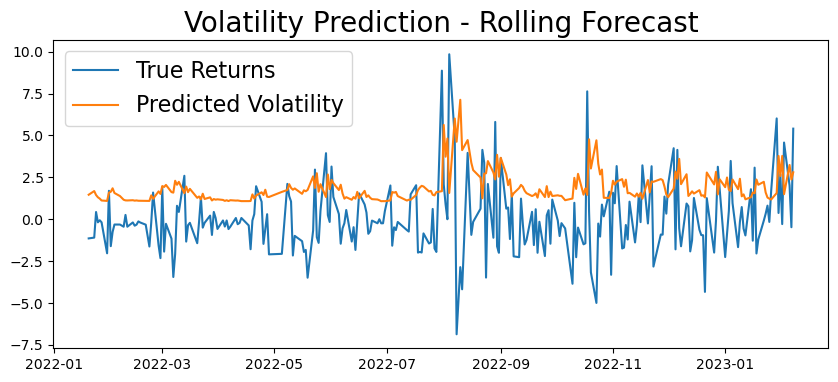

In [158]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-256:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# Fit GARCH(2,2)

In [159]:
model = arch_model(returns, p=2, q=2)

In [160]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 7412.57784544594
Iteration:      2,   Func. Count:     19,   Neg. LLF: 2003323.7574226698
Iteration:      3,   Func. Count:     28,   Neg. LLF: 4251.84946541576
Iteration:      4,   Func. Count:     36,   Neg. LLF: 3787.712756325541
Iteration:      5,   Func. Count:     45,   Neg. LLF: 3858.9030766472915
Iteration:      6,   Func. Count:     53,   Neg. LLF: 3692.8816089495285
Iteration:      7,   Func. Count:     61,   Neg. LLF: 3954.784984855228
Iteration:      8,   Func. Count:     69,   Neg. LLF: 3646.1004514633278
Iteration:      9,   Func. Count:     77,   Neg. LLF: 3647.9004362159085
Iteration:     10,   Func. Count:     85,   Neg. LLF: 3645.454705801554
Iteration:     11,   Func. Count:     92,   Neg. LLF: 3645.439222154074
Iteration:     12,   Func. Count:     99,   Neg. LLF: 3645.436551785555
Iteration:     13,   Func. Count:    106,   Neg. LLF: 3645.4365472958243
Iteration:     14,   Func. Count:    112,   Neg. LLF: 3645.4

In [161]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3645.44
Distribution:                  Normal   AIC:                           7302.87
Method:            Maximum Likelihood   BIC:                           7336.28
                                        No. Observations:                 1935
Date:                Tue, Feb 21 2023   Df Residuals:                     1934
Time:                        21:52:39   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu            -0.0255  4.517e-02     -0.565      0.572 [ -0.114,6.303e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.5208      0.166      3.129  1.753e-03    [  0.195,  0.847]
alpha[1]       0.3191  8.828e-02      3.614  3.012e-04    [  0.146,  0.492]
alpha[2]       0.0901  8.539e-02      1.055      0.291 [-7.728e-02,  0.257]
beta[1]        0.1639      0.186      0.884      0.377    [ -0.200,  0.528]
beta[2]        0.3234      0.143      2.254  2.417e-02  [4.225e-02,  0.605]
===========================================================================

Covariance estimator: robust
"""

# Rolling Forecast

In [162]:
rolling_predictions = []
test_size = 256*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [163]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-256*5:])

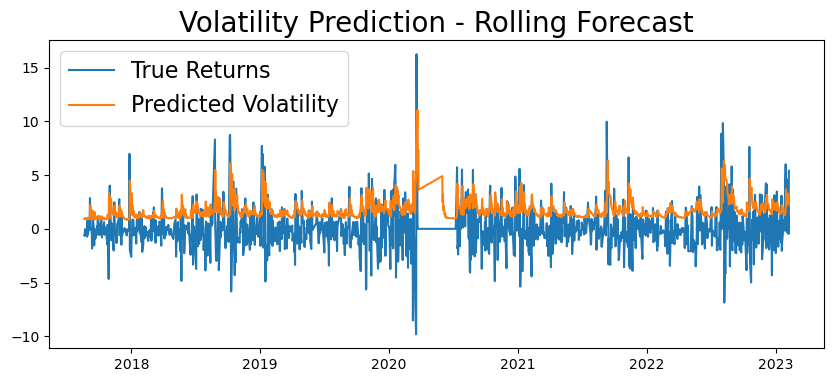

In [164]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-256*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# How to use the model

In [165]:
train = returns
model = arch_model(train, p=3, q=0)
model_fit = model.fit(disp='off')

In [166]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

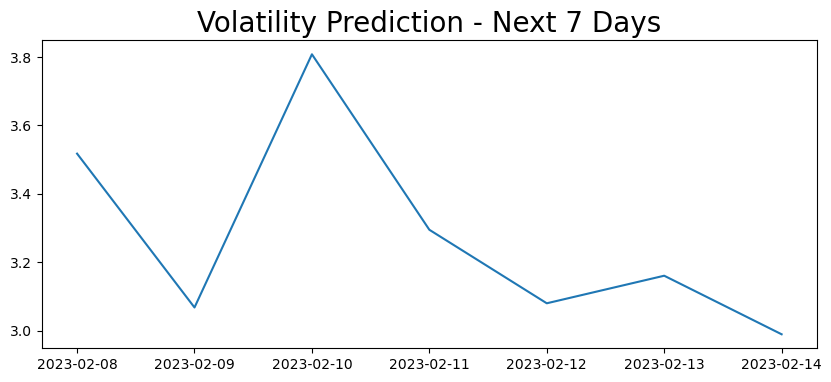

In [168]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)